# ML Project:

## Introduction to Machine Learning in Python (MBA) 

Introduction to Machine Learning in Python (MBA) 

ML Project: "Alzheimer's Disease Dataset"

Names:
Elchai Refoua & Yehezkel Rabinovich 

## About Dataset:

Alzheimer's Disease Dataset [https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data]

This dataset contains extensive health information for 2,149 patients. 
The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. 

# 0. Load python libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, LeaveOneOut, ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc


# 1. Read File


## 1.1. Load the data

In [2]:
df_draft = pd.read_csv("alzheimers_disease_data.csv")
df = df_draft.drop(columns = ['PatientID', 'DoctorInCharge','CholesterolTotal'])


## 1.2. Explore the data (Heads & Describe)

In [3]:
df.head().T

,0,1,2,3,4
Age,73.000000,89.000000,73.000000,74.000000,89.000000
Gender,0.000000,0.000000,0.000000,1.000000,0.000000
Ethnicity,0.000000,0.000000,3.000000,0.000000,0.000000
EducationLevel,2.000000,0.000000,1.000000,1.000000,0.000000
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0.000000,0.000000,0.000000,1.000000,0.000000
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498
SleepQuality,9.025679,7.151293,9.673574,8.392554,5.597238


In [4]:
columns_numerical = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

columns_categorical = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking' ,
    'CardiovascularDisease','Diabetes','Depression', 'HeadInjury', 'Hypertension', 
    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 
    'PersonalityChanges','DifficultyCompletingTasks','Forgetfulness']

# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

df[columns_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665
CholesterolHDL,2149.0,59.463533,23.139174,20.003434,39.095698,59.768237,78.939050,99.980324


# 2. Preprocess the data

## 2.1. Histogram of Age

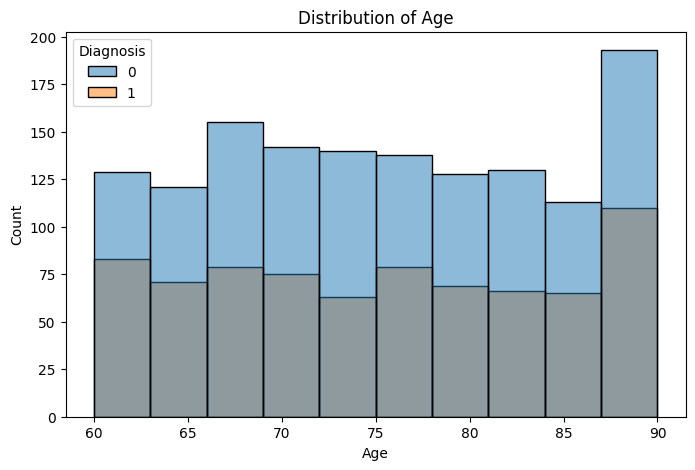

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", kde=False, bins=10, hue='Diagnosis')
plt.title(f'Distribution of Age')
plt.show()

## 2.2. Boxplot of one features - for feeling the data

([<matplotlib.axis.YTick at 0x23a7fa13750>,
 [])

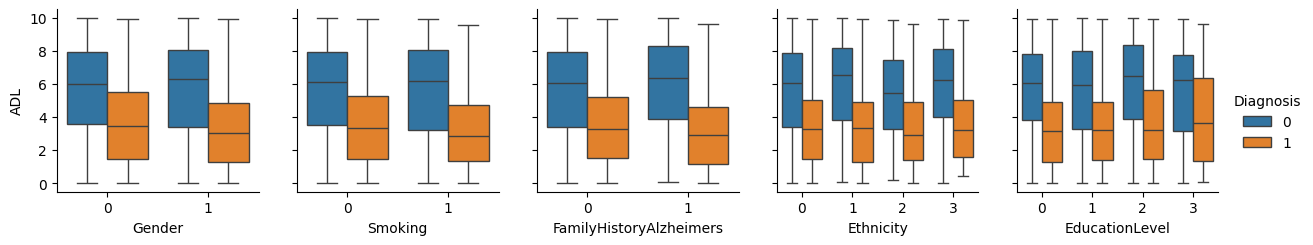

In [6]:
#Initial graph

x_vars = ["Gender", "Smoking", "FamilyHistoryAlzheimers", "Ethnicity", "EducationLevel", ]
y_vars = ["ADL"]

g = sns.PairGrid(df, hue="Diagnosis", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3", width=0.3)
g.map_offdiag(sns.boxplot)
g.add_legend()
plt.yticks(range(0,11,2))


<Figure size 2000x1200 with 0 Axes>

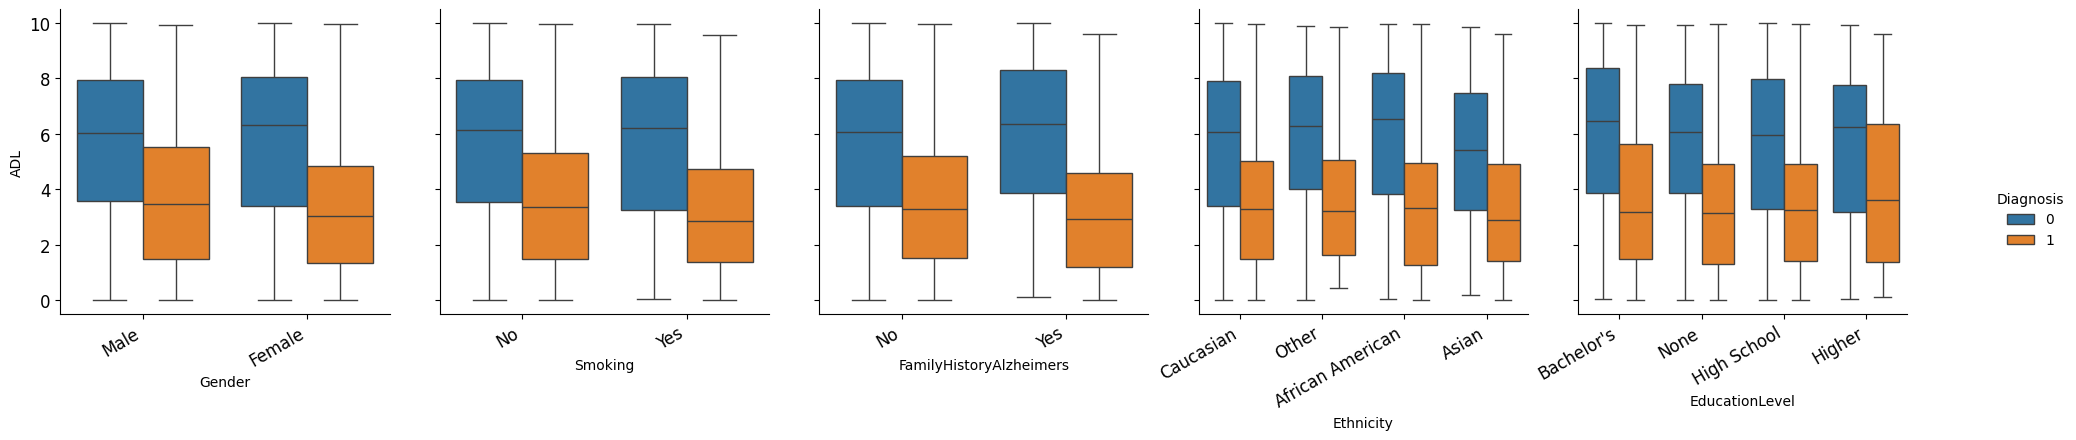

In [7]:
#Final graph

# Set the figure size before creating the PairGrid
plt.figure(figsize=(20, 12))

# Create a copy of your dataframe to avoid modifying the original
df_plot = df.copy()

# Function to map values based on the custom_labels dictionary
def map_categories(series, column_name):
    if column_name in custom_labels:
        mapping = {i: label for i, label in enumerate(custom_labels[column_name])}
        return series.map(mapping)
    return series

# Apply the mappings to each column in x_vars
x_vars = ["Gender", "Smoking", "FamilyHistoryAlzheimers", "Ethnicity", "EducationLevel"]
for col in x_vars:
    df_plot[col] = map_categories(df_plot[col], col)

# Create your plot with the transformed data with adjusted height ratios
g = sns.PairGrid(df_plot, hue="Diagnosis", x_vars=x_vars, y_vars=y_vars, height=4)
g.map_diag(sns.histplot, color=".3", width=0.3)
g.map_offdiag(sns.boxplot)

# Add legend outside the plot
g.add_legend()

# Adjust font size for all x and y labels
for ax in g.axes.flat:
    # Set x-labels font size with consistent alignment
    plt.setp(ax.xaxis.get_majorticklabels(), fontsize=12, rotation=30, ha='right', va='top')
    # Set y-labels font size
    plt.setp(ax.yaxis.get_majorticklabels(), fontsize=12)

plt.yticks(range(0,11,2))

# Adjust layout to prevent legend and labels from being cut off
plt.tight_layout()
plt.subplots_adjust(right=0.92, bottom=0.2)  # Added bottom adjustment for x-labels

## 2.3. Internal features correlation checking

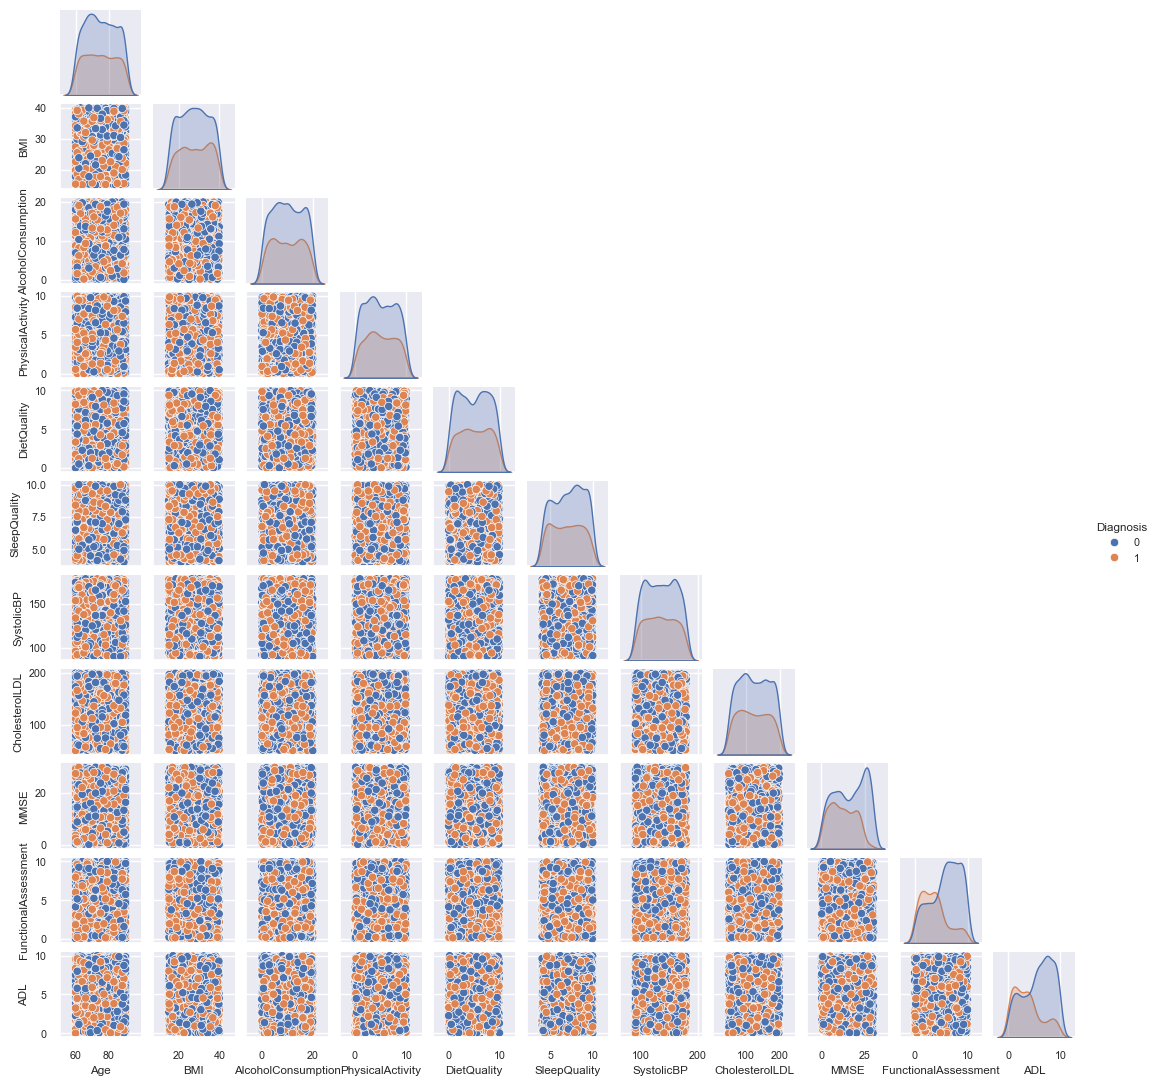

In [8]:
selected_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality','SleepQuality',
        'SystolicBP', 'CholesterolLDL', 'MMSE', 'FunctionalAssessment', 'ADL']

sns.set(font_scale=0.7) 
sns.pairplot(df, vars=selected_features, corner=True , hue='Diagnosis',height=1)  
plt.show()


## 2.4. Normalize the numerical columns

In [9]:
min_max_scaler = MinMaxScaler()
df[columns_numerical] = min_max_scaler.fit_transform(df[columns_numerical])


## 2.6. Features heatmap

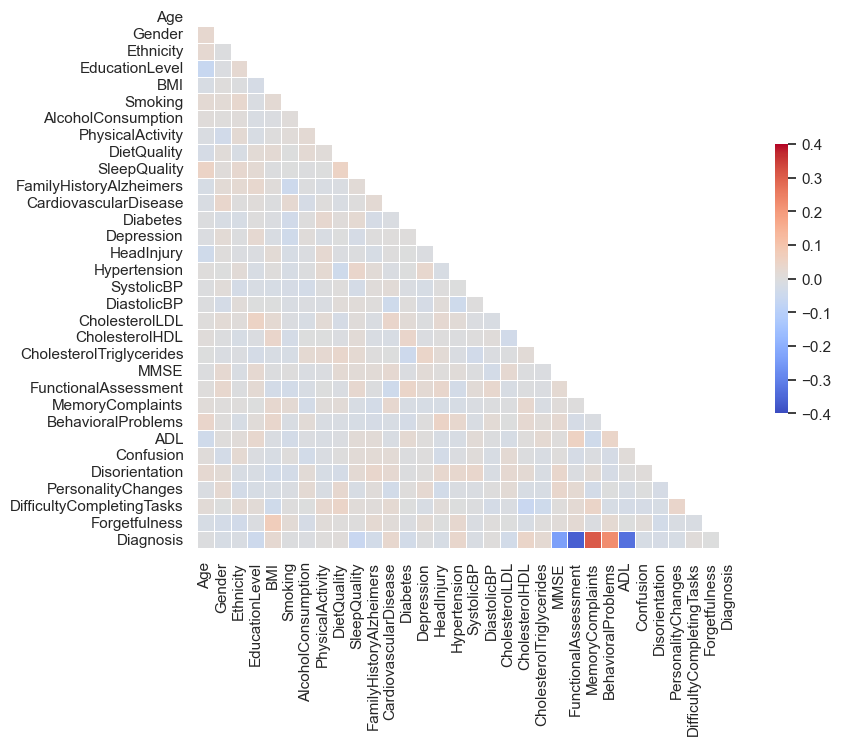

In [10]:
plt.figure(figsize=(10, 7))
mask = np.triu(np.ones_like(df.corr()))
sns.set(font_scale=0.7) 
sns.set_theme(style="white")
sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -0.4, vmax = 0.4, center = 0, annot=False,
            fmt=".2f", square=True, linewidths=.6, cbar_kws={"shrink": .5}, mask=mask, )
plt.show()

## 2.7. Major correlation coefficients

In [11]:
correlation_matrix = df.corr()

strong_correlation_cols = [col for col in correlation_matrix.columns 
                           if abs(correlation_matrix.loc['Diagnosis', col]) >= 0.05 
                           and col != 'Diagnosis']

strong_correlation_cols

['SleepQuality',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL']

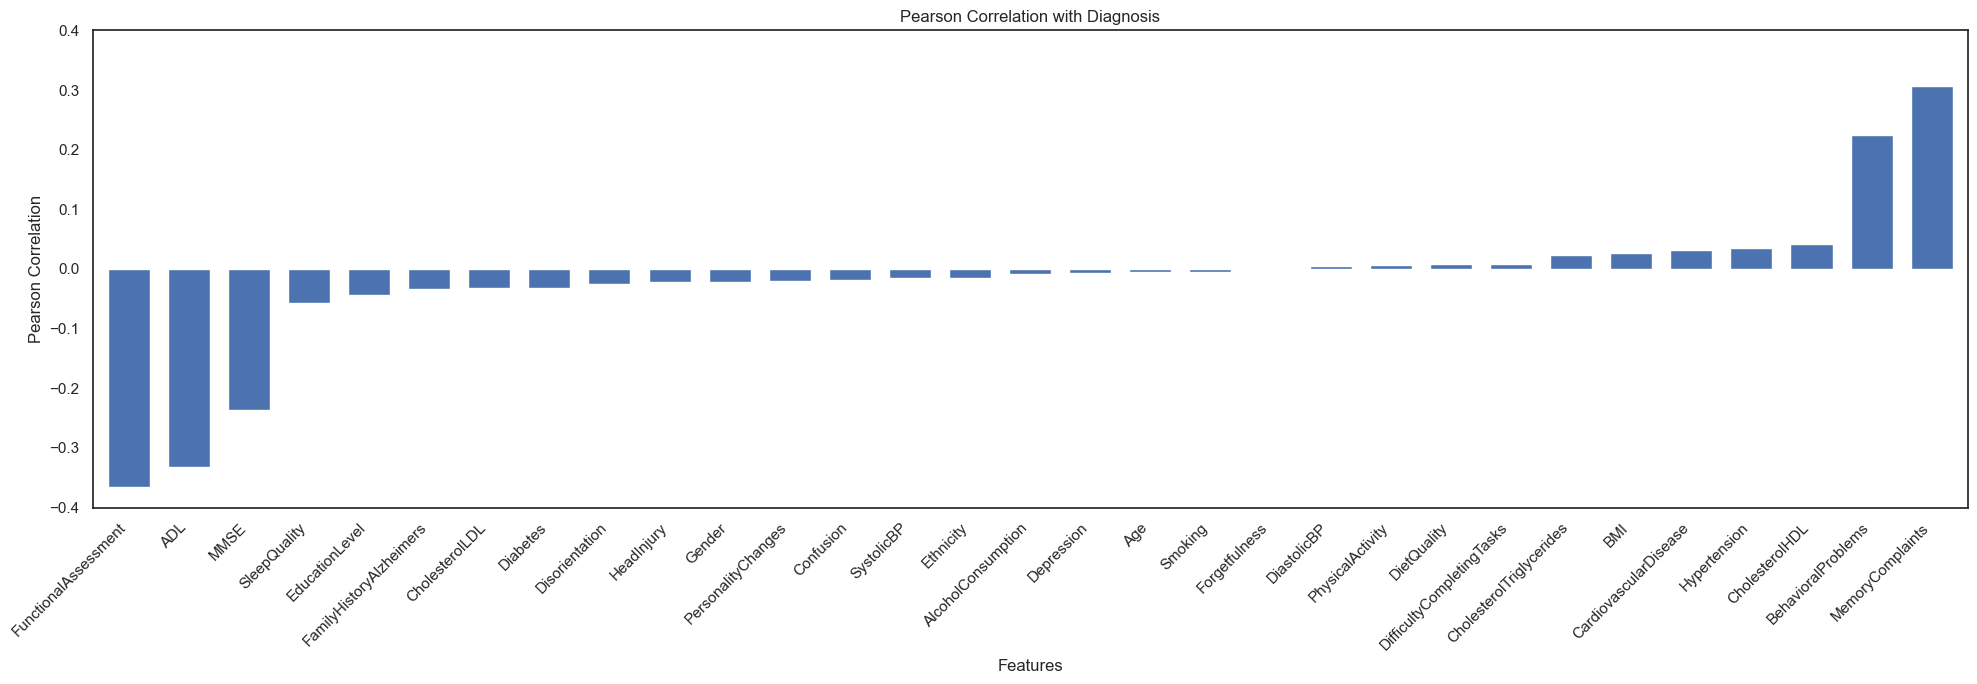

In [12]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-0.4, 0.4], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 2.8. Data balance checking & graphs

In [13]:
df['Diagnosis'].value_counts(normalize=True).to_dict()

{0: 0.6463471382038157, 1: 0.35365286179618427}

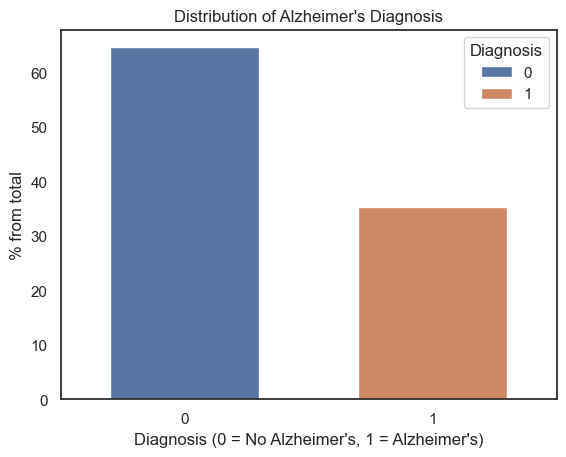

In [14]:
df['Diagnosis'].value_counts()

sns.countplot(x='Diagnosis', data=df,hue="Diagnosis", stat="percent", width=0.6)
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.ylabel("% from total")
plt.show()

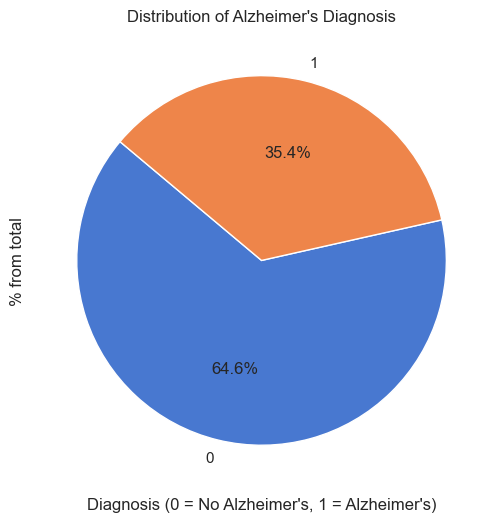

In [15]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.ylabel("% from total")
plt.show()

## 2.9. Preprocessing – Split dataset

In [16]:
X = df.drop(['Diagnosis'], axis=1)
Y = df['Diagnosis']


# 3. Train/test split

In [17]:
df_draft = pd.read_csv("alzheimers_disease_data.csv")
df = df_draft.drop(columns = ['PatientID', 'DoctorInCharge','CholesterolTotal'])

In [18]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

# 4. Model - Fit - Score

## 4.1. Dummy Classifier

In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_clf.predict(x_test)
dummy_clf.score(x_test, y_test)

y_pred = dummy_clf.predict(x_test)

report = classification_report(y_test, y_pred)
print(f' Classification Report:\n{report}\n')

 Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430




c:\Users\yehra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yehra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yehra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 4.2. KNN Model

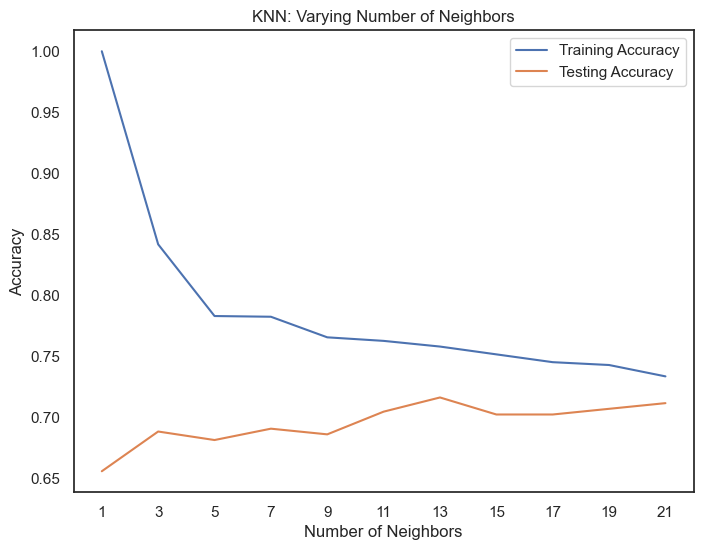

In [20]:
train_acc = {}
test_acc = {}

neighbors = np.arange(1, 22, 2, dtype=int)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_acc[neighbor] = knn.score(x_train, y_train)
    test_acc[neighbor] = knn.score(x_test, y_test)

plt.figure(figsize=(8,6))
plt.xticks(range(1,22,2))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, test_acc.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


## 4.3. Decision Tree Model (Initial: max_depth = 2)

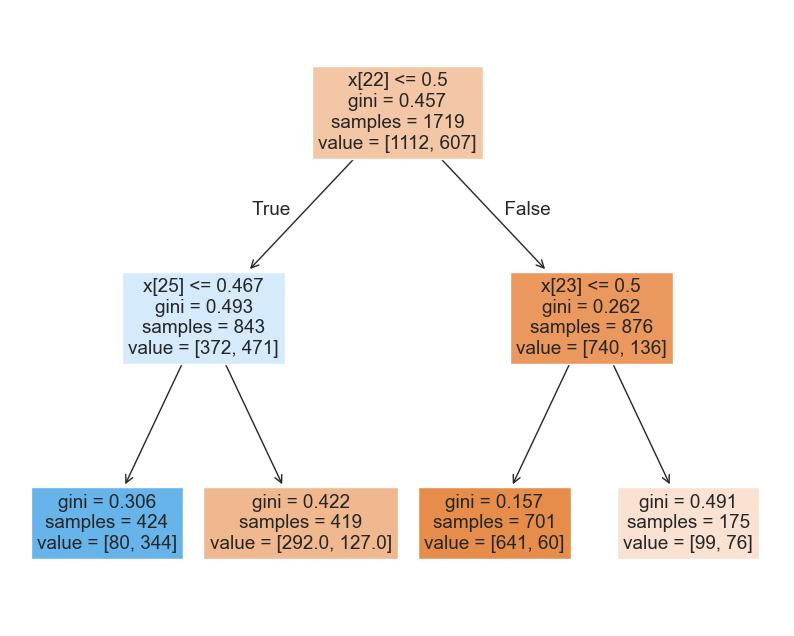

In [21]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(x_train,y_train)

plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True)
plt.show()


In [22]:
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(f' Classification Report:\n{report}\n')


Accuracy: 0.76
 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       277
           1       0.75      0.48      0.59       153

    accuracy                           0.76       430
   macro avg       0.75      0.70      0.71       430
weighted avg       0.76      0.76      0.74       430




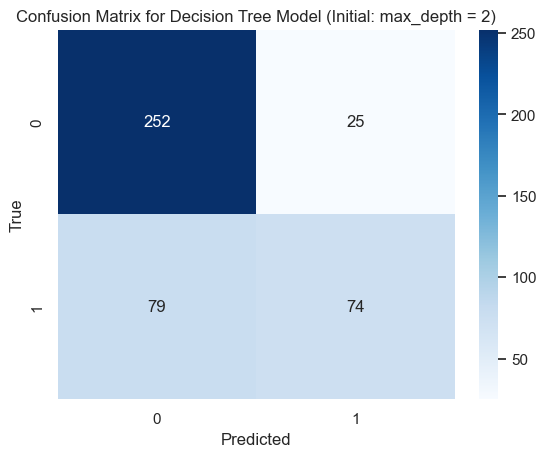

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Model (Initial: max_depth = 2)')
plt.show()

## 4.4. Grid Search for hyperparameter optimization

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       277
           1       0.58      0.37      0.45       153

    accuracy                           0.68       430
   macro avg       0.65      0.61      0.61       430
weighted avg       0.66      0.68      0.66       430

Best Parameters: {'n_neighbors': 5}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Best Parameters: {'C': 1}

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       277
           1       0.79      0.69      0.

c:\Users\yehra\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.85      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}



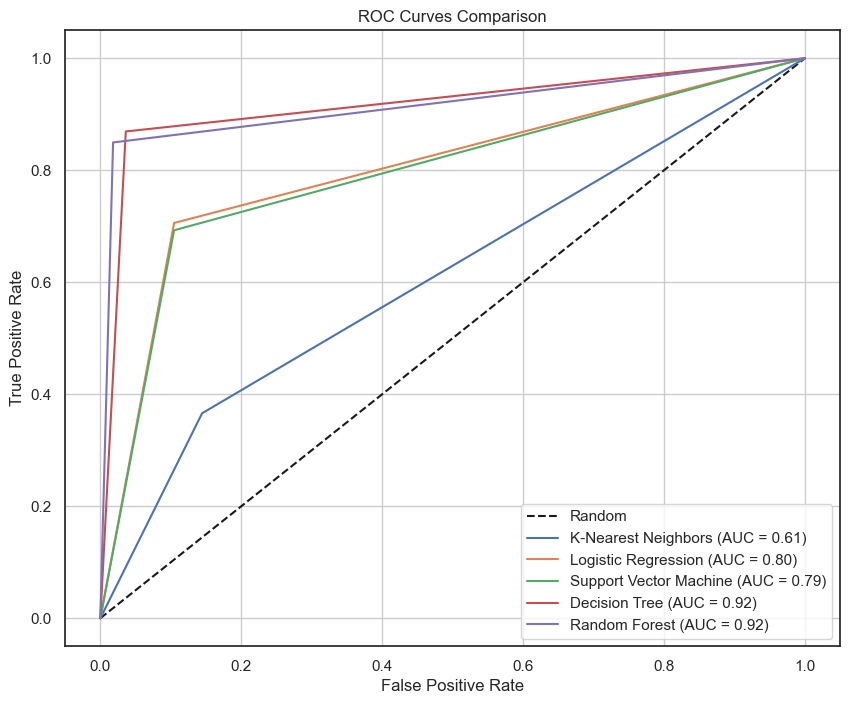

In [24]:
# Set up the plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random')


#define hyperparameter grids for each model
param_grids = {
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9 ,13, 15, 17, 20]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'Decision Tree': {'max_depth': [3, 5, 10,]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15] ,
                       'min_samples_split': [5, 9], 'min_samples_leaf': [2, 5]},
}

#instantiate classification models with default parameters
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),   
}

#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()



In [ ]:
#Decision Tree Model (Initial: max_depth = 5)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf = clf.fit(x_train,y_train)

plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True)
plt.show()

## 4.5. Cross Validation for best model (Decision Tree, max_depth=5)

In [25]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf = clf.fit(x_train,y_train)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97674419 0.9627907  0.97209302 0.97209302 0.97209302 0.99069767
 0.99069767 0.97209302 0.97674419 0.64018692]
Average CV Score:  0.9426233427515758
Number of CV Scores used in Average:  10


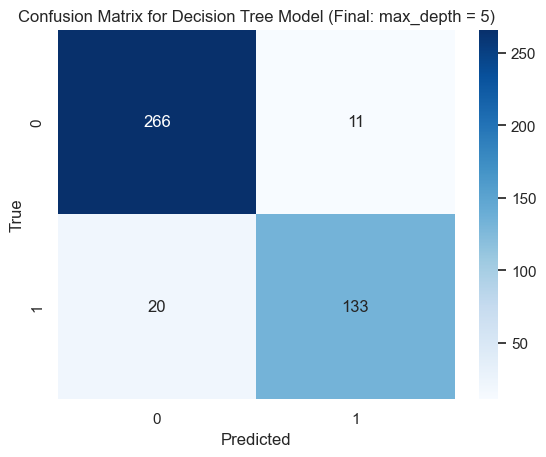

In [26]:
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Model (Final: max_depth = 5)')
plt.show()

## 4.6. Leave one out (LOO)

In [27]:
loo = LeaveOneOut()

scores = cross_val_score(clf, X, Y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 0. 1.]
Average CV Score:  0.9418334108887855
Number of CV Scores used in Average:  2149


## 4.7. Shuffle Split

In [28]:
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 10)

scores = cross_val_score(clf, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95503876 0.94573643 0.94728682 0.93643411 0.95193798 0.92093023
 0.95658915 0.94418605 0.93023256 0.9255814 ]
Average CV Score:  0.9413953488372092
Number of CV Scores used in Average:  10


# לדיון נוסף - נקודות עבור העבודה הסופית (למחוק מפה אחר כך)

לדיון נוסף בסוף העבודה:


השוואה למודלים נוספים עם דיוק גבוה יותר:

https://www.kaggle.com/code/natalyyakobov/binary-classification-96-6-acc-alzheimers

--

האם כדאי היה לפצל ל3 חלקים?
עקרונית אולי כן אבל הדאטה שלנו קטן ולכן בחרנו שלא

https://mlu-explain.github.io/train-test-validation/

--

האם חסרים פרמטרים בדאטה שהם מאוד חשובים?
כמו למשל חלבון טאו וחלבון עמילואיד-ביתא

https://www.tasmc.org.il/bewell/interestareas/gil/alz-research/

--

האם יש דאטה אחד שמאפשר זיהוי
כמו למשל צילום MRI של המוח?
לחפש דוגמה לדאטה סט כזה ב kaggle

# מכאן והלאה זה טיוטה מפעמים קודמות שלא נגעתי...

Normal and standardization of the features...
Split for test (20%) and {80%: for test and valadition}

Models:
0. Dummy classifier 
1. Logestic regerssion with Lasso for remove less important features...
2. KNN (inculde running for loop for k=5:15 and visualize test and train error )
3. SVM (regular and kernel)
4. descision tree with greed search
5. Random forest

(cross validation)

מטריצת בלבול
מדדי דיוק שמשווים בין המודלים
גרף ROC לאחד מהמודלים



Ai code (move from note above line by line and check...)

## 2. Splitting the data into training, validation, and test sets
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## 3. Linear Regression for finding feature weights
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

## Extracting weights
feature_weights = pd.DataFrame({
    'Feature': X.columns,
    'Weight': lin_reg.coef_
})

## Visualizing weights as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_weights.set_index('Feature').T, annot=True, cmap='coolwarm')
plt.title("Feature Weights from Linear Regression")
plt.show()

## 4. Suggestion to reduce less important features
threshold = 0.1  # Define a threshold for importance
important_features = feature_weights[np.abs(feature_weights['Weight']) > threshold]
print("Important Features:")
print(important_features)

## Reducing features for further modeling
X_train_reduced = X_train[important_features['Feature']]
X_val_reduced = X_val[important_features['Feature']]
X_test_reduced = X_test[important_features['Feature']]

## 5. Running multiple ML models with GridSearchCV and Cross-Validation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

results = []

## Evaluate each model with GridSearchCV
for name, model in models.items():
    print(f"\n{name} with GridSearch:")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_reduced, y_train)

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train_reduced, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores for {name}: {cv_scores}")
    print(f"Mean CV Accuracy for {name}: {cv_scores.mean():.2f}")
    print(f"Standard Deviation of CV Accuracy for {name}: {cv_scores.std():.2f}")

    # Test set evaluation
    y_pred = best_model.predict(X_test_reduced)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    print(f"Test Set Accuracy for {name}: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Append results for summary table
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'CV Accuracy': cv_scores.mean(),
        'Test Accuracy': acc
    })

## Create a summary table of results
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)

## Plotting model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')
plt.title("Comparison of Model Test Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

## Visualizing feature importance for Random Forest (example)
best_rf = RandomForestClassifier(random_state=42).fit(X_train_reduced, y_train)
if hasattr(best_rf, 'feature_importances_'):
    importances = best_rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=important_features['Feature'].iloc[indices], y=importances[indices], palette='coolwarm')
    plt.title("Feature Importance - Random Forest")
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.xticks(rotation=45)
    plt.show()
